# Crea tu nube de palabras en R a partir de un texto o documento

![Convertir un texto a Nube de palabras ](header.png)

**Autor:** [Ever Vino](https://opensciencelabs.github.io/articles/authors/ever-vino.html)

Una nube nos sirve para visualizar la frecuencia de palabras dentro de un texto.
En este tutorial usaremos el artículo de [inteligencia artificial](https://es.wikipedia.org/wiki/Inteligencia_artificial) de Wikipedia, para construir nuestra nube de palabras usando las bibliotecas `tm` y `wordcloud`.


## Instalación de pre-requisitos
Para un mejor manejo de lo paquetes, aquí vamos a utilizar la biblioteca `pacman`, esta nos permitirá hacer una instalación y activación de las bibliotecas  de manera rápida. Recuerde instalar Rtools y la versión más reciente de R si está usando Windows.

In [1]:
# install.packages("pacman") # Si no tiene instalada la Biblioteca Pacman ejecutar esta línea de código
library("pacman")

Bibliotecas adicionales requeridas, instaladas y abiertas con `pacman`.

In [2]:
p_load("tm") # Biblioteca para realizar el preprocesado del texto,
p_load("tidyverse") # Biblioteca con funciones para manipular datos.
p_load("wordcloud") # Biblioteca para graficar nuestra nube de palabras.
p_load("RColorBrewer") # Biblioteca para seleccionar una paleta de colores para nuestra nube de palabras.

## Importación del texto
Nuestra fuente de datos es el archivo `texto.txt` que esta dentro de nuestra carpeta de trabajo. Para saber la carpeta de trabajo puede ejecutar `getwd()`. Para cambiar la carpeta de trabajo use la función `setwd()`.
Luego de importar el texto vamos a convertirlo en un objeto tipo Source, esto facilitará la minería del texto y su posterior modificación.

In [3]:
texto <- read_file("texto.txt")

* `read_file()`: Función de la biblioteca `tidyverse` que nos permite importar archivos de texto. El resultado de la función es un vector de un sólo elemento.

In [4]:
texto <- VCorpus(VectorSource(texto), 
                 readerControl = list(reader = readPlain, language = "es"))

* `VCorpus (x, readerControl(y))`: Donde x es un objeto del tipo Source, se recomienda que sea un objeto del tipo VectorSource. Para `readerControl(y)` `y` es una lista de parámetros para leer `x`.

* `VectorSource(vector)`: Convierte una lista o vector a un objeto tipo VectorSource. 

## Preprocesado de texto
Una vez importado el texto, tenemos que eliminar la palabras que actúan como conectores, separadores de palabras , de oraciones, y números que no aportarán al análisis del texto, para esto usamos la función `tm_map()` que nos permite aplicar funciones al texto del Corpus.

In [7]:
texto <- tm_map(texto, tolower)
texto <- texto %>% 
            tm_map(removePunctuation) %>% 
            tm_map(removeNumbers) %>% 
            tm_map(removeWords, stopwords("spanish"))
texto <- tm_map(texto, removeWords, c("puede", "ser", "pues", "si", "aún", "cómo"))
texto <- tm_map(texto, stripWhitespace)

* `tm_map(text, funcion, parametros_de_funcion)`: Transforma el contenido de texto de un objeto Corpus o VCorpus, aplicando las funciones de transformación de texto.

* `tolower`: Función de transformación de texto, usado para convertir todas la mayúsculas a minúsculas.

* `removeNumber`: Función para eliminar los números del texto.

+ `removeWord`: Función para remover palabras, 

* `stopword("lang")`: lista de palabras conectoras en el lenguaje lang, es argumento de la función `removeWord`.

* `stripWhitespace`: Función para remover los espacios blancos de un texto.

Nótese que usamos ambas notación para transformar el texto del corpus la notación normal `tm_map(x, FUN)` como también la notación de la bilbioteca de `tydiverse` `pipeoperator` `>%>` que toma como argumento inicial el resultado de la anterior función.

_Si quiere observar los cambios del texto puede ejecutar en la consola `writeLines(as.character(texto[[1]]))`, esto imprimirá el resultado en la consola._

## Construyendo la tabla de frecuencia

In [8]:
texto <- tm_map(texto, PlainTextDocument)

* `PlainTextDocument`: Convierte texto a un objeto tipo PlainTextDocument. Para el ejemplo, convierte un `VCorpus` a `PlainTextDocument` el cuál contiene metadatos y nombres de las filas. haciendo factible la conversión a un matriz.

In [9]:
tabla_frecuencia <- DocumentTermMatrix(texto)

* `DocumentTermMatrix(texto)`: Convierte texto a un objeto tipo term-document matrix. Es un objeto que va a contener la frecuencia de palabras.

In [10]:
tabla_frecuencia <- cbind(palabras = tabla_frecuencia$dimnames$Terms, 
                          frecuencia = tabla_frecuencia$v)

Extraermos los datos que nos interesan del objeto tabal_frecuencia y los juntamos con `cbind()`.

_Ejecutando en la consola `View(tabla_frecuencia)` notamos que es un objeto, para acceder a sus valores usamos el símbolo `$` dicho de otra manera: para acceder a las `palabras` usamos `tabla_frecuencia$dimnames$Terms` y para su correspondientes frecuencia en el texto `tabla_frecuencia$v`._

In [11]:
# Convertimos los valores enlazados con cbind a un objeto dataframe.
tabla_frecuencia<-as.data.frame(tabla_frecuencia) 
# Forzamos a que la columna de frecuencia contenga valores numéricos.
tabla_frecuencia$frecuencia<-as.numeric(tabla_frecuencia$frecuencia)
# Ordenamos muestra tabla de frecuencias de acuerdo a sus valores numéricos.
tabla_frecuencia<-tabla_frecuencia[order(tabla_frecuencia$frecuencia, decreasing=TRUE),]

_Con estos últimos ajustes ya tenemos nuestra tabla de frecuencias para graficarla._
_Puede verificar los resultados ejecutando en la consola `head(tabla_frecuencia)`_

## Graficando nuestra nube de palabras
Una vez obtenida nuestra tabla de frecuencia sólo es necesario aplicar la función `wordcloud()`.

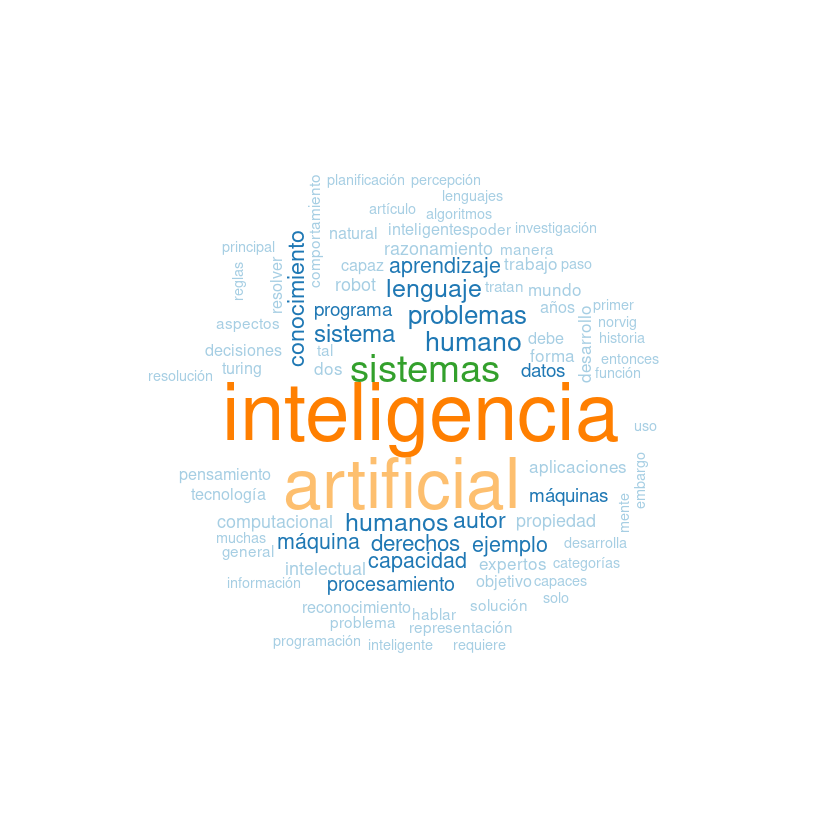

In [12]:
wordcloud(words = tabla_frecuencia$palabras, 
          freq = tabla_frecuencia$frecuencia, 
          min.freq = 5, 
          max.words = 100, 
          random.order = FALSE, 
          colors = brewer.pal(8,"Paired"))

* `wordcloud(word, freq, min.freq, max.words, random.order, color)`: Función para graficar la frecuencia de palabras, el tamaño de la palabra graficada será proporcional a la frecuencia de la misma. Esta función grafica las palabras en `word` con sus respectivas frecuencias `freq`, sólo usará las palabras que como mínimo tenga una frecuencia mínima `min.freq`. graficará como maximo `maxwords` las posiciones podran se aleatorias o no, dependiendo del valor de `random.order`, los colores estan dados en forma de lista en `colors`.
* `brewer.pal(n, "paleta")`: Devuelve `n` valores de la `paleta`. Para la función `brewer.pal()` puede usar las paletas `"Dark2"`, `"Set1"`, `"Blues"` entre otros.

_Cada vez que ejecute la función le mostrará diferentes resultados, para evitar esto si quiere puede fijar un estado para generar números aleatorio que utiliza la función wordcloud usando por ejemplo: `set.seed(1234)`  (puede alterar el valor del argumento numeral para diferentes resultados)._

## Guardando nuestra nube de palabras
Usamos la función `png()` para guardar la gráfica que se genera usando wordcloud. Tambien puede usar otras funciones como `jpeg`, `svg` y otros.
Nótese que usamos la función `png()` y `dev.off()` antes y despues de la función generadora de la grafica `wordcloud()`
```r
png("nube.png", width = 800,height = 800, res = 100)
    wordcloud(...)
dev.off()
```

* `png("nombre.png", with, height, res) ... dev.off()`: Guarda el gráfico generado en formato png, dentro del directorio actual de trabajo. Lo guarda con el nombre `"nombre.png"` con el ancho y alto  en pixeles de `with` y `height` respectivamente; y con la resolución `res` en ppi. Con `dev.off()` concluimos la obtención de datos de `png()`.

_Existe obra biblioteca mejorada para generar una nube de palabras esta es `wordcloud2`, lo mencionamos por si tiene interés en explorar otras opciones, pero teniendo en cuenta que R está optimizado para realizar tratamiento de datos y no tanto para dibujar palabras, es recomendable usar otras opciones online o programas de diseño gráfico para mejores resultados y usar R para la obtención de la tabla de frecuencia de las palabras._
_Nota: Existen palabras que pueden derivar de una misma palabra y expresan el mismo significado, como ser nube, nubes, nubarrón, estas aparecen como diferentes aqui para este ejemplo, estos requieren la aplicación adicional de una función que contemple estas variaciones linguisticas, lamentablemente a la fecha no hay una función equivalente para el español para R. Sin embargo si realiza el análisis de palabras en inglés puede usar `tm_map(Corpus_en_ingles, stemDocument, language="english")`._

## Referencias
- [Wikipedia-Inteligencia Artificial](https://es.wikipedia.org/wiki/Inteligencia_artificial)
- [Documentacion de R](https://www.rdocumentation.org)